In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/MyDrive/dataset1/common_dataset_touch_features_offset.xlsx'

In [3]:
import pandas as pd

data = pd.read_excel(file_path)

In [4]:
data = data.drop(columns='user_id')

In [5]:
data = data.drop(columns='touch')
data = data.drop(columns='finger')
data = data.drop(columns='palm')
data = data.drop(columns='fist')

In [6]:
#Veri setinin genel bilgileri
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Columns: 3201 entries, touch_type to 3200
dtypes: int64(3201)
memory usage: 50.2 MB
None


In [7]:
#touch_type dağılımı
print(data['touch_type'].value_counts())

touch_type
0    1144
1     123
8     123
2     112
9     103
7      99
6      92
3      90
5      88
4      82
Name: count, dtype: int64


In [8]:
data.columns = data.columns.astype(str)

In [9]:
#İlk birkaç satırı
print(data.head())

   touch_type   1  2   3   4   5   6   7   8   9  ...  3191  3192  3193  3194  \
0           0   4  0  12 -16  -2   0 -25   6  -6  ...   -51     4     1     3   
1           0 -52 -2  17   1  15  -9 -22 -17  -8  ...   -36    -1    49     6   
2           0   2  7  14  -5  16  12 -17 -22 -13  ...     1    55    54   -51   
3           0   0  6  10   8  -2   2   1  -4   9  ...     1     2    28     2   
4           0   2  5   3   0  17  10 -19 -19 -13  ...   -25    51    -6   -45   

   3195  3196  3197  3198  3199  3200  
0   -42     2     3    61     2    -1  
1   -58     8    49    63    47     6  
2   -26    55    56     9    55    52  
3     1     9    55    53    -7    51  
4    -4    61    48    60    46     5  

[5 rows x 3201 columns]


**Default SVC modeli**

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
#  'touch_type'
X = data.drop(columns='touch_type')
y = data['touch_type']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#Default SVC modeli ile eğitim
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [14]:
y_pred = svc.predict(X_test)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       231
           1       0.37      0.56      0.44        18
           2       0.27      0.15      0.19        20
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00        20
           5       0.33      0.05      0.09        20
           6       0.00      0.00      0.00        20
           7       0.30      0.80      0.44        15
           8       0.80      0.69      0.74        29
           9       0.38      0.18      0.24        17

    accuracy                           0.68       412
   macro avg       0.32      0.34      0.30       412
weighted avg       0.57      0.68      0.60       412



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


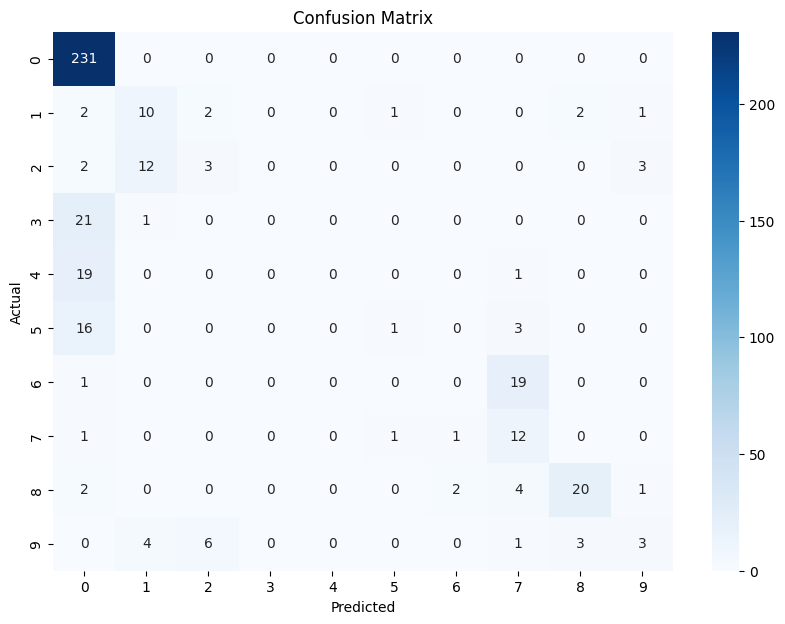

In [16]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
from sklearn.model_selection import GridSearchCV

# Hyperparametre optimizasyonu
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [18]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  21.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  22.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  14.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  15.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  15.6s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  11.6s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  12.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  12.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  14.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  11.9s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   3.6s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [19]:
best_svc = grid.best_estimator_
y_pred_best = best_svc.predict(X_test)

In [20]:
# Performans değerlendirmesi
print("Best Parameters:", grid.best_params_)
print(classification_report(y_test, y_pred_best))

Best Parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       231
           1       0.60      0.50      0.55        18
           2       0.47      0.45      0.46        20
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00        20
           5       0.50      0.05      0.09        20
           6       0.44      0.20      0.28        20
           7       0.46      0.40      0.43        15
           8       0.72      0.62      0.67        29
           9       0.46      0.35      0.40        17

    accuracy                           0.69       412
   macro avg       0.44      0.36      0.37       412
weighted avg       0.59      0.69      0.62       412



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


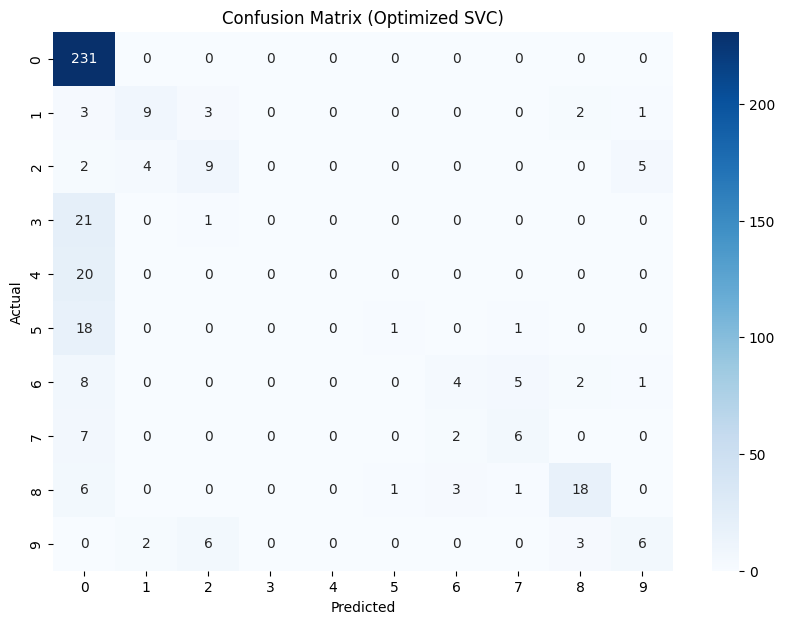

In [21]:
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Optimized SVC)')
plt.show()

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [35]:
X = data.drop(columns='touch_type')
y = data['touch_type']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# PCA modelini oluşturma
pca = PCA(n_components=0.95)  # Varyansın %95'ini koruyacak şekilde bileşenleri seç
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [29]:
pca_optimal = PCA(n_components=n_components)
X_train_pca = pca_optimal.fit_transform(X_scaled)
X_test_pca = pca_optimal.transform(scaler.transform(X_test))

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train_pca = pca_optimal.transform(scaler.transform(X_train))
X_test_pca = pca_optimal.transform(scaler.transform(X_test))

In [39]:
print("PCA ile seçilen bileşen sayısı:", pca.n_components_)

PCA ile seçilen bileşen sayısı: 827


In [40]:
svc = SVC()
svc.fit(X_train_pca, y_train)

SVC()

In [41]:
y_train_pred = svc.predict(X_train_pca)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Eğitim veri seti doğruluğu:", train_accuracy)

# Test veri seti üzerinde tahmin yapma
y_test_pred = svc.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test veri seti doğruluğu:", test_accuracy)

# Sınıflandırma raporu
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_test_pred))

Eğitim veri seti doğruluğu: 0.9051094890510949
Test veri seti doğruluğu: 0.6771844660194175

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       231
           1       0.40      0.56      0.47        18
           2       0.36      0.20      0.26        20
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00        20
           5       0.00      0.00      0.00        20
           6       0.17      0.05      0.08        20
           7       0.28      0.60      0.38        15
           8       0.74      0.69      0.71        29
           9       0.44      0.24      0.31        17

    accuracy                           0.68       412
   macro avg       0.32      0.33      0.31       412
weighted avg       0.56      0.68      0.60       412



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
